In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the data
call_data_path = 'call_option_data.csv'  # Update this path
put_data_path = 'put_option_data.csv'  # Update this path
index_data=pd.read_csv('index_data_bank.csv')

call_data = pd.read_csv(call_data_path)
put_data = pd.read_csv(put_data_path)


# Preprocess data (Example: Convert '-' to NaN and then to 0 for numerical calculations)
call_data.replace('-', np.nan, inplace=True)
put_data.replace('-', np.nan, inplace=True)
call_data.fillna(0, inplace=True)
put_data.fillna(0, inplace=True)

# Convert data types
for col in ['Open Int  ', 'Change in OI  ', 'No. of contracts  ','Strike Price  ','Underlying Value  ']:
    call_data[col] = pd.to_numeric(call_data[col])
    put_data[col] = pd.to_numeric(put_data[col])

In [230]:
index_data

,Date,Open,High,Low,Close,Volume
0,7/03/23,44957.94922,45353.19922,44882.10156,45158.10156,228200
1,7/04/23,45310.55078,45655.50000,45000.25000,45301.44922,463000
2,7/05/23,45169.69922,45418.89844,45073.39844,45151.80078,366300
3,7/06/23,45060.55078,45417.50000,45042.60156,45339.89844,244900
4,7/07/23,45118.05078,45227.25000,44844.80078,44925.00000,220900
...,...,...,...,...,...,...
119,12/22/23,47837.75000,48071.39844,47415.85156,47491.85156,165800
120,12/26/23,47576.39844,47838.44922,47411.64844,47724.85156,118700
121,12/27/23,47818.50000,48347.64844,47806.69922,48282.19922,184900
122,12/28/23,48479.05078,48636.44922,48343.14844,48508.55078,391100


In [192]:
call_data

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value
0,03-Jul-2023,06-Jul-2023,CE,37500.0,0,0,0,6556.85,0.0,0.0,0.0,45158.10
1,03-Jul-2023,06-Jul-2023,CE,38000.0,0,0,0,6067.95,0.0,0.0,0.0,45158.10
2,03-Jul-2023,06-Jul-2023,CE,38500.0,0,0,0,5650.00,0.0,100.0,0.0,45158.10
3,03-Jul-2023,06-Jul-2023,CE,39000.0,0,0,0,5325.00,0.0,125.0,0.0,45158.10
4,03-Jul-2023,06-Jul-2023,CE,39500.0,0,0,0,5230.10,0.0,1025.0,0.0,45158.10
...,...,...,...,...,...,...,...,...,...,...,...,...
78958,29-Dec-2023,26-Dec-2024,CE,49500.0,0,0,0,4936.25,0.0,0.0,0.0,48292.25
78959,29-Dec-2023,26-Dec-2024,CE,51000.0,0,0,0,4181.70,0.0,0.0,0.0,48292.25
78960,29-Dec-2023,26-Dec-2024,CE,52500.0,0,0,0,3513.25,0.0,0.0,0.0,48292.25
78961,29-Dec-2023,26-Dec-2024,CE,54000.0,0,0,0,2928.20,0.0,0.0,0.0,48292.25


In [193]:
put_data

,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,No. of contracts,Open Int,Change in OI,Underlying Value
0,03-Jul-2023,06-Jul-2023,PE,37500.0,4.45,5.60,2.85,3.70,323130.0,1285750.0,276300.0,45158.10
1,03-Jul-2023,06-Jul-2023,PE,38000.0,3.65,5.95,3.40,4.50,138440.0,287375.0,151975.0,45158.10
2,03-Jul-2023,06-Jul-2023,PE,38500.0,4.75,6.55,3.20,5.45,91321.0,476550.0,470175.0,45158.10
3,03-Jul-2023,06-Jul-2023,PE,39000.0,4.95,7.25,4.40,5.85,147668.0,1091575.0,384375.0,45158.10
4,03-Jul-2023,06-Jul-2023,PE,39500.0,5.30,7.60,4.15,5.85,127925.0,911475.0,304850.0,45158.10
...,...,...,...,...,...,...,...,...,...,...,...,...
79071,29-Dec-2023,26-Dec-2024,PE,49500.0,0,0,0,2461.35,0.0,0.0,0.0,48292.25
79072,29-Dec-2023,26-Dec-2024,PE,51000.0,0,0,0,3101.75,0.0,0.0,0.0,48292.25
79073,29-Dec-2023,26-Dec-2024,PE,52500.0,0,0,0,3828.25,0.0,0.0,0.0,48292.25
79074,29-Dec-2023,26-Dec-2024,PE,54000.0,0,0,0,4638.15,0.0,0.0,0.0,48292.25


In [194]:
list(call_data)

['Date  ',
 'Expiry  ',
 'Option type  ',
 'Strike Price  ',
 'Open  ',
 'High  ',
 'Low  ',
 'Close  ',
 'No. of contracts  ',
 'Open Int  ',
 'Change in OI  ',
 'Underlying Value  ']

In [195]:
call_data = call_data.rename(columns={'Strike Price  ': 'Strike Price', 'Underlying Value  ': 'Underlying Value','Open Int  ': 'Open Int','Change in OI  ':'Change in OI','Date  ':'Date'})
put_data = put_data.rename(columns={'Strike Price  ': 'Strike Price', 'Underlying Value  ': 'Underlying Value','Open Int  ': 'Open Int','Change in OI  ':'Change in OI','Date  ':'Date'})

In [196]:
call_option_data=call_data
put_option_data=put_data

In [197]:
call_agg = call_option_data.groupby('Date').agg({'Open Int': 'sum', 'No. of contracts  ': 'sum'}).rename(columns={'Open Int': 'Total Open Int (Call)', 'No. of contracts  ': 'Total Volume (Call)'})
put_agg = put_option_data.groupby('Date').agg({'Open Int': 'sum', 'No. of contracts  ': 'sum'}).rename(columns={'Open Int': 'Total Open Int (Put)', 'No. of contracts  ': 'Total Volume (Put)'})

# Merge aggregated data for calls and puts
agg_data = call_agg.merge(put_agg, left_index=True, right_index=True).reset_index()

# Convert the 'Date' column to datetime format
agg_data['Date'] = pd.to_datetime(agg_data['Date'], format='%d-%b-%Y')





# Calculate the total volume and open interest for both call and put options combined, and the PCR ratio
agg_data['Total Volume (Call & Put)'] = agg_data['Total Volume (Call)'] + agg_data['Total Volume (Put)']
agg_data['Total Open Int (Call & Put)'] = agg_data['Total Open Int (Call)'] + agg_data['Total Open Int (Put)']
agg_data['PCR (Open Int)'] = agg_data['Total Open Int (Put)'] / agg_data['Total Open Int (Call)']

# Filter and sort the data by date
filtered_sorted_data = agg_data[(agg_data['Date'] >= '2023-07-03') & (agg_data['Date'] <= '2023-12-29')].sort_values(by='Date')

# Save the filtered and sorted data to a CSV file
#output_path = 'sorted_filtered_option_data_with_pcr.csv'
#filtered_sorted_data.to_csv(output_path, index=False, date_format='%d-%b-%Y')


In [198]:
filtered_sorted_data

,Date,Total Open Int (Call),Total Volume (Call),Total Open Int (Put),Total Volume (Put),Total Volume (Call & Put),Total Open Int (Call & Put),PCR (Open Int)
7,2023-07-03,47386885.0,45586439.0,66110575.0,36994521.0,82580960.0,113497460.0,1.395124
12,2023-07-04,53687915.0,52849854.0,73900265.0,47875906.0,100725760.0,127588180.0,1.376479
16,2023-07-05,69597475.0,62140722.0,75127445.0,64256595.0,126397317.0,144724920.0,1.079456
20,2023-07-06,74520850.0,148139030.0,85435205.0,134272206.0,282411236.0,159956055.0,1.146460
26,2023-07-07,53746750.0,34779996.0,40395000.0,34369647.0,69149643.0,94141750.0,0.751580
...,...,...,...,...,...,...,...,...
88,2023-12-22,46696065.0,54953120.0,40978715.0,51449695.0,106402815.0,87674780.0,0.877562
101,2023-12-26,55426565.0,58864118.0,61107050.0,52480859.0,111344977.0,116533615.0,1.102487
105,2023-12-27,55680165.0,145070763.0,75949235.0,116985831.0,262056594.0,131629400.0,1.364027
110,2023-12-28,70725810.0,236087488.0,76699745.0,243438504.0,479525992.0,147425555.0,1.084466


In [199]:
index_data  

,Date,Open,High,Low,Close,Volume
0,7/03/23,44957.94922,45353.19922,44882.10156,45158.10156,228200
1,7/04/23,45310.55078,45655.50000,45000.25000,45301.44922,463000
2,7/05/23,45169.69922,45418.89844,45073.39844,45151.80078,366300
3,7/06/23,45060.55078,45417.50000,45042.60156,45339.89844,244900
4,7/07/23,45118.05078,45227.25000,44844.80078,44925.00000,220900
...,...,...,...,...,...,...
119,12/22/23,47837.75000,48071.39844,47415.85156,47491.85156,165800
120,12/26/23,47576.39844,47838.44922,47411.64844,47724.85156,118700
121,12/27/23,47818.50000,48347.64844,47806.69922,48282.19922,184900
122,12/28/23,48479.05078,48636.44922,48343.14844,48508.55078,391100


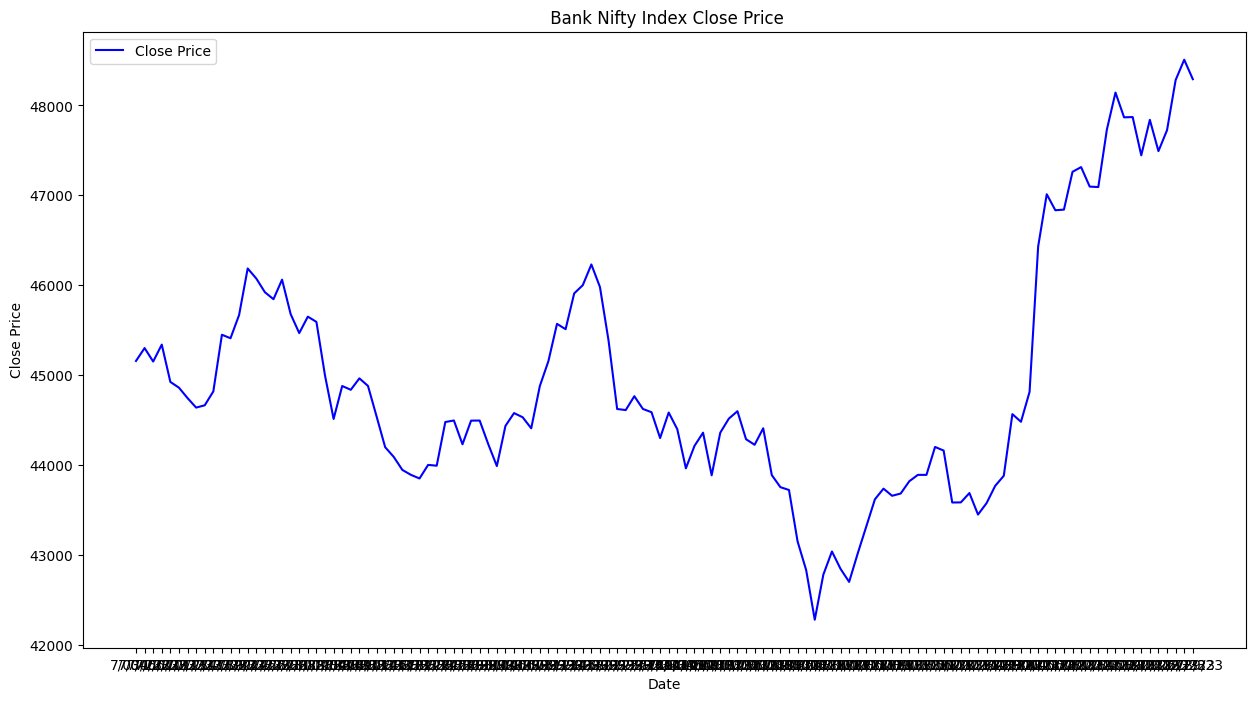

In [200]:
plt.figure(figsize=(15, 8))
plt.plot(index_data['Date'], index_data['Close'], label='Close Price', color='b')
plt.title(' Bank Nifty Index Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

In [201]:
filtered_sorted_data['Underlying Value'] = index_data['Close']

In [202]:
filtered_sorted_data

,Date,Total Open Int (Call),Total Volume (Call),Total Open Int (Put),Total Volume (Put),Total Volume (Call & Put),Total Open Int (Call & Put),PCR (Open Int),Underlying Value
7,2023-07-03,47386885.0,45586439.0,66110575.0,36994521.0,82580960.0,113497460.0,1.395124,44639.44922
12,2023-07-04,53687915.0,52849854.0,73900265.0,47875906.0,100725760.0,127588180.0,1.376479,45669.30078
16,2023-07-05,69597475.0,62140722.0,75127445.0,64256595.0,126397317.0,144724920.0,1.079456,45845.00000
20,2023-07-06,74520850.0,148139030.0,85435205.0,134272206.0,282411236.0,159956055.0,1.146460,45651.10156
26,2023-07-07,53746750.0,34779996.0,40395000.0,34369647.0,69149643.0,94141750.0,0.751580,44964.44922
...,...,...,...,...,...,...,...,...,...
88,2023-12-22,46696065.0,54953120.0,40978715.0,51449695.0,106402815.0,87674780.0,0.877562,43658.64844
101,2023-12-26,55426565.0,58864118.0,61107050.0,52480859.0,111344977.0,116533615.0,1.102487,43880.94922
105,2023-12-27,55680165.0,145070763.0,75949235.0,116985831.0,262056594.0,131629400.0,1.364027,46431.39844
110,2023-12-28,70725810.0,236087488.0,76699745.0,243438504.0,479525992.0,147425555.0,1.084466,47314.25000


In [203]:
list(filtered_sorted_data)

['Date',
 'Total Open Int (Call)',
 'Total Volume (Call)',
 'Total Open Int (Put)',
 'Total Volume (Put)',
 'Total Volume (Call & Put)',
 'Total Open Int (Call & Put)',
 'PCR (Open Int)',
 'Underlying Value']

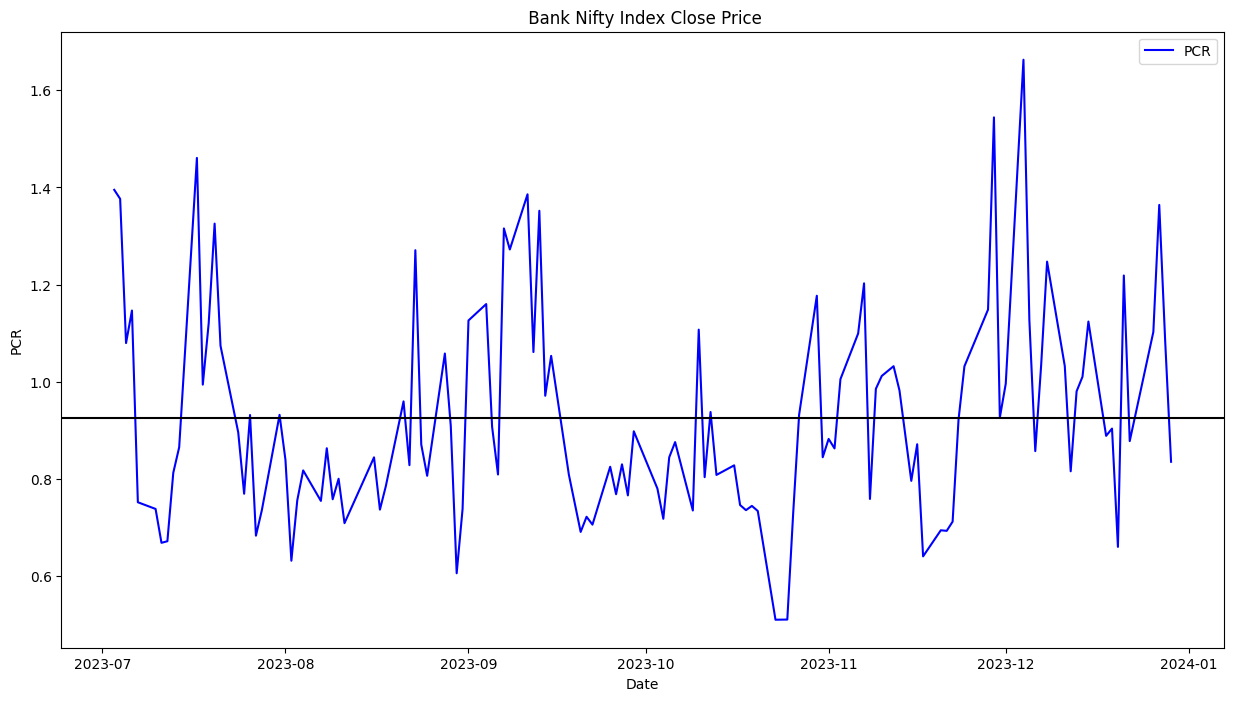

In [204]:
plt.figure(figsize=(15, 8))
plt.plot(filtered_sorted_data['Date'], filtered_sorted_data['PCR (Open Int)'], label='PCR', color='b')
plt.title(' Bank Nifty Index Close Price')
plt.xlabel('Date')
plt.ylabel('PCR')
plt.axhline(filtered_sorted_data['PCR (Open Int)'].mean(), color='black')
plt.legend()

In [205]:
merge_data=pd.DataFrame()

In [206]:
# Convert 'Open Int' columns to numeric, handling non-numeric values as NaNs


# Retry merging and calculating PCR with corrected 'Open Int' data types
merged_data=filtered_sorted_data

# Calculate PCR

initial_capital = 1000000.0
capital = initial_capital
stop_loss_percent = 2.0 / 100  # Stop loss threshold
trades = []  # To track trades
capital_history = [initial_capital]
# Generate signals based on PCR thresholds
merged_data['Signal'] = np.where(merged_data['PCR (Open Int)'] <0.75, 'Buy', 
                                 np.where(merged_data['PCR (Open Int)'] > 1.25, 'Sell', 'Hold'))

# Assuming 'Underlying Value' as closing price for simplicity to execute trades on the next day

merged_data['Next Day Price'] = merged_data['Underlying Value'].shift(-1) # Price to execute trade on next day

# Backtesting setup
trades = merged_data[merged_data['Signal'] != 'Hold'].copy()
trades['Next Next Day Price'] = trades['Next Day Price'].shift(-1)
trades['Trade Result'] = np.where(trades['Signal'] == 'Buy',
                                
                                  
                                  trades['Next Next Day Price'] - trades['Next Day Price'], 
                                  trades['Next Day Price'] - trades['Next Next Day Price'])

# Summarize results
total_profit = trades['Trade Result'].sum()
total_trades = trades.shape[0]
win_rate = (trades['Trade Result'] > 0).mean() * 100  # Convert to percentage

# Benchmark: Buy and hold return
buy_and_hold_return = ((merged_data['Underlying Value'].iloc[-1] - merged_data['Underlying Value'].iloc[0]) / 
                       merged_data['Underlying Value'].iloc[0]) * 100  # Convert to percentage

total_profit, total_trades, win_rate, buy_and_hold_return





(1270.4648200000156, 39, 51.28205128205128, 7.231832059777371)

In [207]:
trades

,Date,Total Open Int (Call),Total Volume (Call),Total Open Int (Put),Total Volume (Put),Total Volume (Call & Put),Total Open Int (Call & Put),PCR (Open Int),Underlying Value,Signal,Next Day Price,Next Next Day Price,Trade Result
7,2023-07-03,47386885.0,45586439.0,66110575.0,36994521.0,82580960.0,113497460.0,1.395124,44639.44922,Sell,45669.30078,45845.00000,-175.69922
12,2023-07-04,53687915.0,52849854.0,73900265.0,47875906.0,100725760.0,127588180.0,1.376479,45669.30078,Sell,45845.00000,43989.14844,1855.85156
37,2023-07-10,60910060.0,40911122.0,44941090.0,39929192.0,80840314.0,105851150.0,0.737827,44496.19922,Buy,43989.14844,44409.10156,419.95312
42,2023-07-11,72357655.0,36033059.0,48339035.0,33743445.0,69776504.0,120696690.0,0.668057,43989.14844,Buy,44409.10156,45909.44922,1500.34766
46,2023-07-12,79634765.0,57251788.0,53459000.0,62277539.0,119529327.0,133093765.0,0.671302,44409.10156,Buy,45909.44922,44287.94922,-1621.50000
66,2023-07-17,45748425.0,50519017.0,66832345.0,45672095.0,96191112.0,112580770.0,1.460867,44360.60156,Sell,44287.94922,43017.19922,1270.75000
78,2023-07-20,63608660.0,155145619.0,84315175.0,142294710.0,297440329.0,147923835.0,1.325530,42832.00000,Sell,43017.19922,47097.55078,-4080.35156
106,2023-07-27,89306580.0,251426976.0,60979175.0,239116174.0,490543150.0,150285755.0,0.682807,47012.25000,Buy,47097.55078,48508.55078,1411.00000
111,2023-07-28,50092340.0,42847406.0,36828015.0,45445825.0,88293231.0,86920355.0,0.735203,47097.55078,Buy,48508.55078,44745.05078,-3763.50000
4,2023-08-02,79805220.0,106492497.0,50372610.0,114406863.0,220899360.0,130177830.0,0.631194,44925.00000,Buy,44745.05078,45384.60156,639.55078


In [208]:
filtered_sorted_data['PCR (Open Int)'].shift(-1)

7      1.376479
12     1.079456
16     1.146460
20     0.751580
26     0.737827
         ...   
88     1.102487
101    1.364027
105    1.084466
110    0.834983
115         NaN
Name: PCR (Open Int), Length: 124, dtype: float64

In [215]:
position =0
val_buy = 0
val_short=0
portfolio_returns = []
signaldict = {'Date' : [], 'Signal' : []}
portfolio_capital=1000000
for index, row in filtered_sorted_data.iterrows():
    if(position==0 ):
        if(row['PCR (Open Int)']<0.75):
         position=1
         val_buy = row['Underlying Value']

         signaldict['Date'].append(row['Date'])
         signaldict['Signal'].append('Buy')
         
         portfolio_capital = portfolio_capital - val_buy
        else:
            if(row['PCR (Open Int)']>1.25):
                position=-1
                
                signaldict['Date'].append(row['Date'])
                signaldict['Signal'].append('Short')
               
                val_short = row['Underlying Value']
                portfolio_capital = portfolio_capital - val_short 

    else:
        if(position==1 ):
            if(row['Underlying Value']<=val_buy*(1-stop_loss_percent)):

                position=0

                signaldict['Date'].append(row['Date'])
                signaldict['Signal'].append('Sell')
               
                portfolio_capital +=(row['Underlying Value'])
                portfolio_returns.append(portfolio_capital)
        
                continue
            if(row['PCR (Open Int)']>1.25):
                position=-1
                val_short = row['Underlying Value']

                signaldict['Date'].append(row['Date'])
                signaldict['Signal'].append('Sell')
            
                portfolio_returns.append(portfolio_capital)


        else:
            if(position==-1):
                if(row['Underlying Value']>=val_short*(1+stop_loss_percent)):
                    position=0
                    portfolio_capital +=row['Underlying Value']
                    portfolio_returns.append(portfolio_capital)

                    signaldict['Date'].append(row['Date'])
                    signaldict['Signal'].append('Buy')

                    continue
                if(row['PCR (Open Int)']<0.75):
                    position=1
                    val_buy = row['Underlying Value']

                    signaldict['Date'].append(row['Date'])
                    signaldict['Signal'].append('Buy')

                    portfolio_capital = portfolio_capital +(val_buy)
                    portfolio_returns.append(portfolio_capital)
                    continue

In [216]:
sigdf = pd.DataFrame(signaldict)

In [217]:
sigdf

,Date,Signal
0,2023-07-03,Short
1,2023-07-04,Buy
2,2023-07-10,Buy
3,2023-07-17,Sell
4,2023-07-27,Buy
5,2023-07-28,Buy
6,2023-08-01,Sell
7,2023-08-02,Buy
8,2023-08-09,Sell
9,2023-08-11,Buy


In [264]:
sigdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23 non-null     datetime64[ns]
 1   Signal  23 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 500.0+ bytes


In [301]:
sell_inds = sigdf[sigdf['Signal'] == 'Sell']['Date']
buy_inds = sigdf[sigdf['Signal'] == 'Buy']['Date']
short_inds = sigdf[sigdf['Signal'] == 'Short']['Date']

In [305]:
type(sell_inds.index)

pandas.core.indexes.base.Index

In [298]:
filtered_sorted_data['Date']

7     2023-07-03
12    2023-07-04
16    2023-07-05
20    2023-07-06
26    2023-07-07
         ...    
88    2023-12-22
101   2023-12-26
105   2023-12-27
110   2023-12-28
115   2023-12-29
Name: Date, Length: 124, dtype: datetime64[ns]

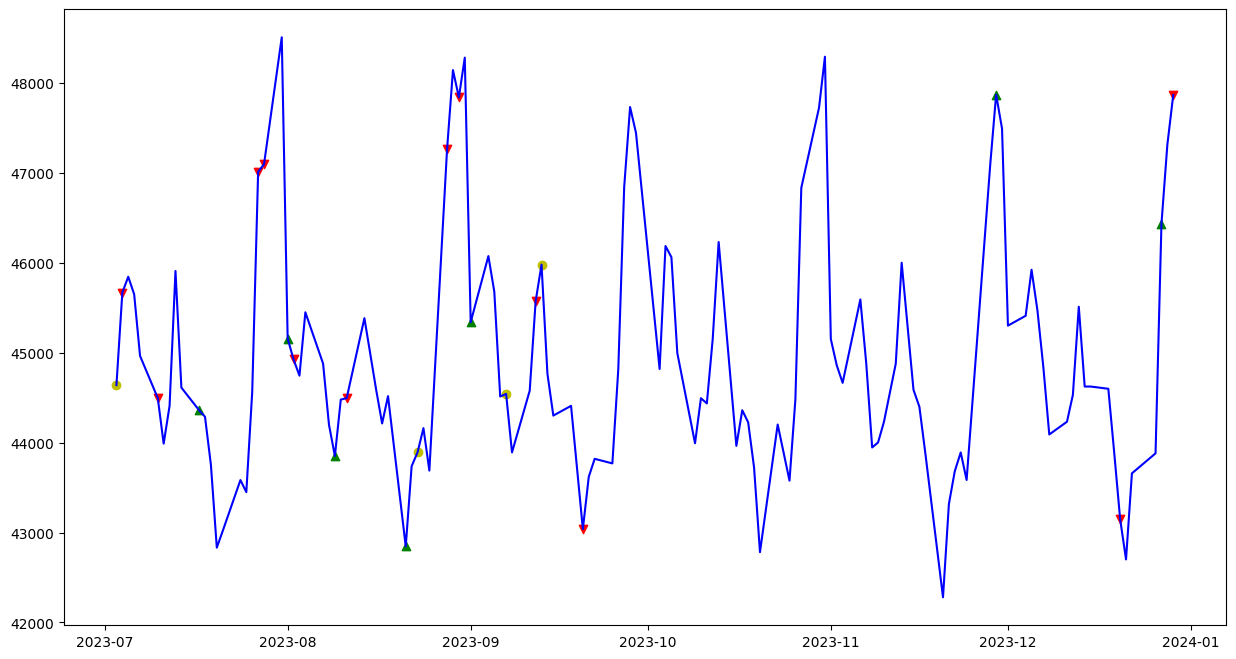

In [309]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(filtered_sorted_data['Date'], filtered_sorted_data['Underlying Value'], label='Close Price', color='b')

for date in sell_inds:
    ax.scatter(date, filtered_sorted_data[filtered_sorted_data['Date'] == date]['Underlying Value'].values, color = 'g', marker='^')

for date in buy_inds:
    ax.scatter(date, filtered_sorted_data[filtered_sorted_data['Date'] == date]['Underlying Value'].values, color = 'r', marker='v')

for date in short_inds:
    ax.scatter(date, filtered_sorted_data[filtered_sorted_data['Date'] == date]['Underlying Value'].values, color = 'y', marker = 'o')

plt.show()

In [210]:
portfolio_returns

[1001029.8515600001,
 956533.6523400001,
 1003545.9023400001,
 1001606.4531200001,
 1000532.5039000001,
 998883.2031200001,
 1002253.9531200001,
 999753.7031200001,
 1000782.60156,
 997841.89844,
 997841.89844,
 1040993.09766,
 1040993.09766,
 1088860.79688]

<function matplotlib.pyplot.legend(*args, **kwargs)>

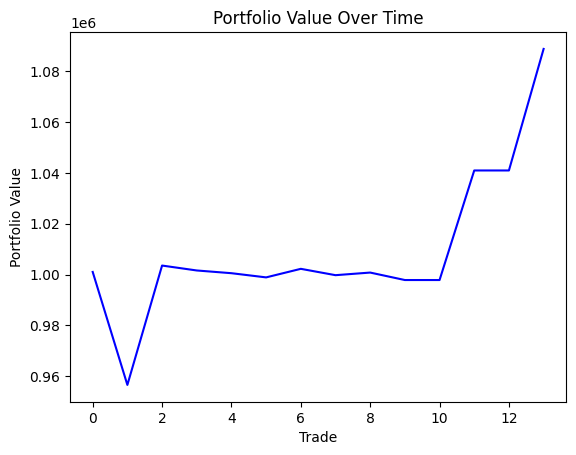

In [211]:
plt.plot(portfolio_returns, label='Portfolio Value', color='b')
plt.title('Portfolio Value Over Time')
plt.xlabel('Trade')
plt.ylabel('Portfolio Value')
plt.legend

In [213]:
merged_data

,Date,Total Open Int (Call),Total Volume (Call),Total Open Int (Put),Total Volume (Put),Total Volume (Call & Put),Total Open Int (Call & Put),PCR (Open Int),Underlying Value,Signal,Next Day Price
7,2023-07-03,47386885.0,45586439.0,66110575.0,36994521.0,82580960.0,113497460.0,1.395124,44639.44922,Sell,45669.30078
12,2023-07-04,53687915.0,52849854.0,73900265.0,47875906.0,100725760.0,127588180.0,1.376479,45669.30078,Sell,45845.00000
16,2023-07-05,69597475.0,62140722.0,75127445.0,64256595.0,126397317.0,144724920.0,1.079456,45845.00000,Hold,45651.10156
20,2023-07-06,74520850.0,148139030.0,85435205.0,134272206.0,282411236.0,159956055.0,1.146460,45651.10156,Hold,44964.44922
26,2023-07-07,53746750.0,34779996.0,40395000.0,34369647.0,69149643.0,94141750.0,0.751580,44964.44922,Hold,44496.19922
...,...,...,...,...,...,...,...,...,...,...,...
88,2023-12-22,46696065.0,54953120.0,40978715.0,51449695.0,106402815.0,87674780.0,0.877562,43658.64844,Hold,43880.94922
101,2023-12-26,55426565.0,58864118.0,61107050.0,52480859.0,111344977.0,116533615.0,1.102487,43880.94922,Hold,46431.39844
105,2023-12-27,55680165.0,145070763.0,75949235.0,116985831.0,262056594.0,131629400.0,1.364027,46431.39844,Sell,47314.25000
110,2023-12-28,70725810.0,236087488.0,76699745.0,243438504.0,479525992.0,147425555.0,1.084466,47314.25000,Hold,47867.69922


In [278]:
def cagr(ending_value, starting_value, periods):
    """
    Calculate the Compound Annual Growth Rate (CAGR).
    
    :param ending_value: The ending value of the investment
    :param starting_value: The starting value of the investment
    :param periods: Number of periods
    :return: CAGR
    """
    return (ending_value / starting_value) ** (1 / periods) - 1



def sharpe_ratio(returns, rf_rate):
    """
    Calculate the Sharpe ratio.
    
    :param returns: Pandas Series of returns
    :param rf_rate: Risk-free rate per period
    :return: Sharpe ratio
    """
    excess_returns = returns - rf_rate
    return np.mean(excess_returns) / np.std(excess_returns)



def sortino_ratio(returns, rf_rate, target=0):
    """
    Calculate the Sortino ratio.
    
    :param returns: Pandas Series of returns
    :param rf_rate: Risk-free rate per period
    :param target: The minimum acceptable return
    :return: Sortino ratio
    """
    downside_returns = returns[returns < target] - rf_rate
    expected_return = np.mean(returns - rf_rate)
    downside_std = np.std(downside_returns)
    
    return expected_return / downside_std


def max_drawdown(returns):
    """
    Calculate the Maximum Drawdown (MDD).
    
    :param returns: Pandas Series of cumulative returns
    :return: MDD
    """
    wealth_index = 1000 * (1 + returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks) / previous_peaks
    
    return drawdown.min()


def returns_to_drawdown_ratio(returns):
    """
    Calculate the Returns to Drawdown ratio.
    
    :param returns: Pandas Series of returns
    :return: Returns to Drawdown ratio
    """
    cumulative_returns = (1 + returns).cumprod() - 1
    mdd = max_drawdown(returns)
    
    return cumulative_returns[-1] / abs(mdd)

In [280]:
portfolio_returns[-1]

1088860.79688

In [281]:
initial_capital

1000000.0

In [282]:
cagr(portfolio_returns[-1], initial_capital,124)


0.0006867841898208216

In [283]:
sharpe_ratio(pd.Series(portfolio_returns), 0.05)

34.556530343861475

In [286]:
max_drawdown(pd.Series(portfolio_returns))

0.0

<Axes: title={'center': 'DrawDown'}>

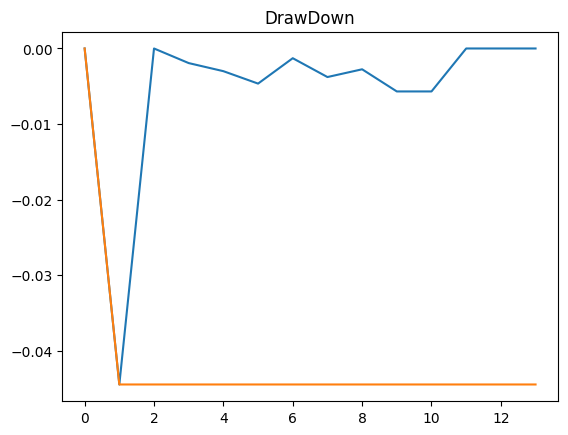

In [289]:
# We are going to use a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = pd.Series(portfolio_returns).rolling(window, min_periods=1).max()
Daily_Drawdown = pd.Series(portfolio_returns)/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

# Plot the results
plt.title('DrawDown')
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()
